## Examine an X-ray with imageio


##  1 Load the image with imageio

In [63]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import imageio

from glob import glob

In [ ]:
DIR = "images/"
xray_image = imageio.v3.imread(os.path.join(DIR, "00024719_000.png"))

In [50]:
trainImg = glob(DIR+"*.png")

In [49]:
trainImg.sort()
len(trainImg)

10000

## 2 Check shape 1024x1024 pixels dtype 8-bit integers

In [52]:
print("the image shape of data: ", xray_image.shape)
print("the image data type: ", xray_image.dtype)

the image shape of data:  (1024, 1024)
the image data type:  uint8


## 3 display the image in gray scale colormap

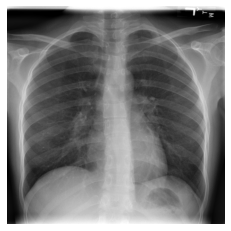

In [56]:
plt.imshow(xray_image, cmap="gray")
plt.axis("off")
plt.show()

## Combine images into a multidimensional array

## 1 create a three-dimensional array where first dimension corresponds to image number

In [ ]:
num_imgs = 9

combined_xray_images_1 = np.array(
    [imageio.v3.imread(os.path.join(DIR, f"00027927_00{i}.png")) for i in range(num_imgs)]
)

## 2 Check the shape of new X-ray image array containing 9 stacked images

In [53]:
combined_xray_images_1.shape

(9, 1024, 1024)

## 3 display health progress by ploting each frames 

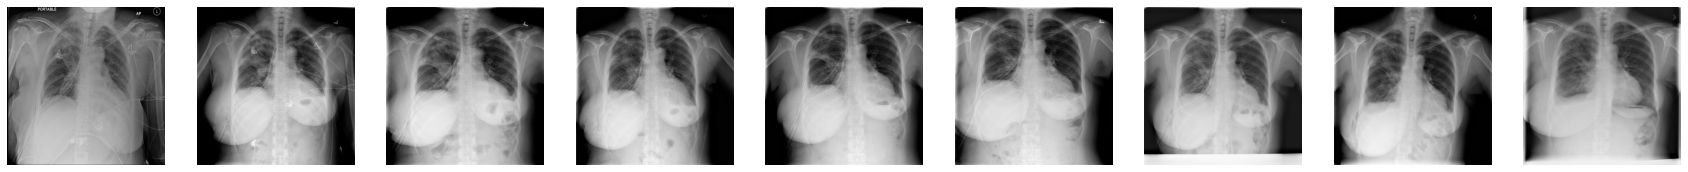

In [65]:
fig, axes = plt.subplots(nrows = 1, ncols=num_imgs, figsize=(30,30))

for img, ax in zip(combined_xray_images_1, axes):
    ax.imshow(img, cmap="gray")
    ax.axis("off")

## 4 create GIF file with imageio.mimwrite() and display in the notebook

In [68]:
GIF_PATH = os.path.join(DIR, "xray_image.gif")
imageio.mimwrite(GIF_PATH, combined_xray_images_1, format=".gif", fps=1)

FileNotFoundError: The directory '/Users/nilsagor/Downloads/dataset_practise/spaceship-titanic/xray_analysis/images' does not exist

<img src="xray_image.gif" width="750" align="center">

## Appy masks to X-ray with np.where

In [61]:
print("The data type of the xray image", xray_image.dtype)
print("The minimum pixel value ", np.min(xray_image))
print("The maximum pixel value ", np.max(xray_image))
print("The average pixel value ", np.mean(xray_image))
print("The median pixel value ", np.median(xray_image))

The data type of the xray image uint8
The minimum pixel value  0
The maximum pixel value  255
The average pixel value  108.19216442108154
The median pixel value  103.0


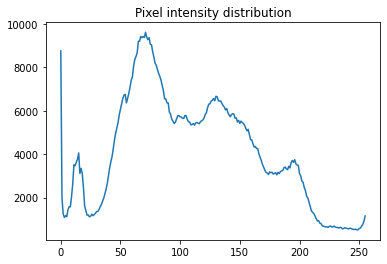

In [60]:
pixel_intensity_distribution = ndimage.histogram(
    xray_image, min=np.min(xray_image), max=np.max(xray_image), bins=256
)

plt.plot(pixel_intensity_distribution)
plt.title("Pixel intensity distribution")
plt.show()

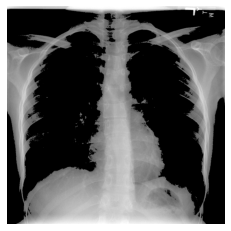

In [59]:
xray_image_mask_noisy = np.where(xray_image >100, xray_image, 0)
plt.imshow(xray_image_mask_noisy, cmap="gray")
plt.axis("off")
plt.show()

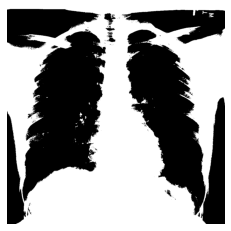

In [58]:
xray_image_mask_less_noisy = np.where(xray_image >100, 1, 0)
plt.imshow(xray_image_mask_less_noisy, cmap="gray")
plt.axis("off")
plt.show()

### Comparing result

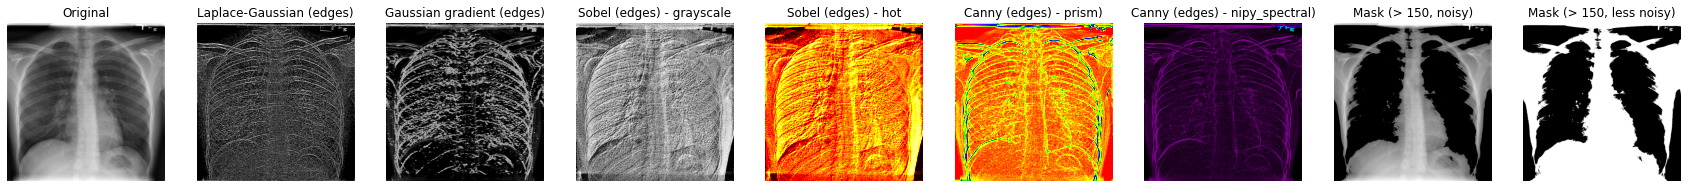

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=(30, 30))

axes[0].set_title("Original")
axes[0].imshow(xray_image, cmap="gray")
axes[1].set_title("Laplace-Gaussian (edges)")
axes[1].imshow(xray_image_laplace_gaussian, cmap="gray")
axes[2].set_title("Gaussian gradient (edges)")
axes[2].imshow(xray_image_gaussian_gradient, cmap="gray")
axes[3].set_title("Sobel (edges) - grayscale")
axes[3].imshow(xray_image_sobel, cmap="gray")
axes[4].set_title("Sobel (edges) - hot")
axes[4].imshow(xray_image_sobel, cmap="hot")
axes[5].set_title("Canny (edges) - prism)")
axes[5].imshow(xray_image_canny, cmap="prism")
axes[6].set_title("Canny (edges) - nipy_spectral)")
axes[6].imshow(xray_image_canny, cmap="nipy_spectral")
axes[7].set_title("Mask (> 150, noisy)")
axes[7].imshow(xray_image_mask_noisy, cmap="gray")
axes[8].set_title("Mask (> 150, less noisy)")
axes[8].imshow(xray_image_mask_less_noisy, cmap="gray")
for i in axes:
    i.axis("off")
plt.show()